## Final Project Submission

Please fill out:
* Student name: Allie Kelly
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Victor
* Blog post URL:


 ## First Step: Import all necessary packages and data

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
df = pd.read_csv('kc_house_data.csv')
print(df.describe())
print(df.info())
df.head()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


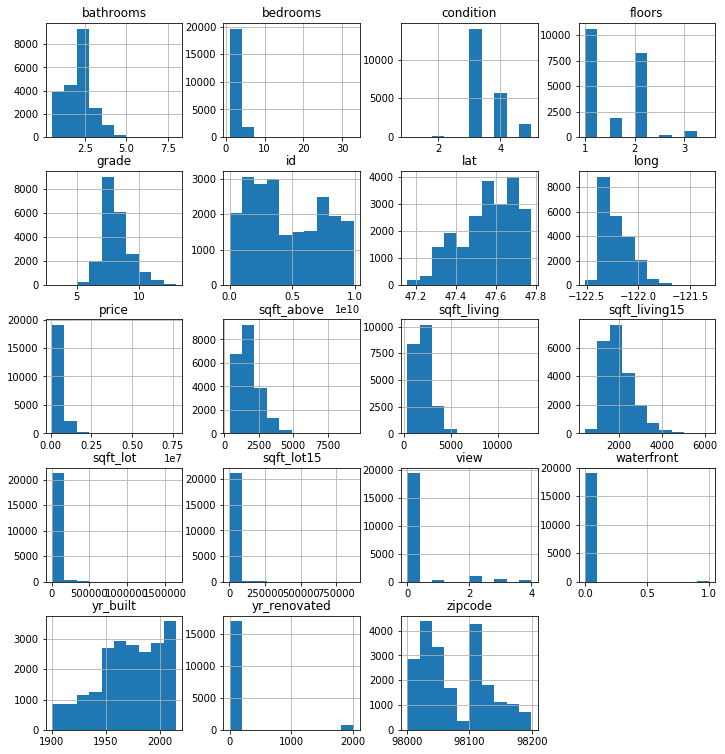

In [72]:
df.hist(figsize=(12,13)); #Get histograms to explore distributions of variables

## Preliminary Investigation
### Data Types

A few things stuck out to me first, namely that the bedroom max value is 33, which is almost an unbelieveable number and may have been intended to be just 3. When I clean the data, I may substitute for the mean/mode value to mitigate any disruption due to such an extreme outlier. 

I also noticed that the basement square-footage values are strings instead of floats, which will need to be changed. 

Year renovated, View, and Waterfront all have null values in them which will need to be investigated. 

Also, the zipcode series is an integer, but should be a string as zipcodes are immutable and should not be dealt with as a number, barring any rezoning which isn't a concern for this process. Changing the datatype may not be necessary for this project though. 

All categorical series are integers/floats, which will need to be changed to strings and one-hot encoded.

### Histograms

You can see most of the variables are categorical variables such as waterfront, view, year renovated, floors, condition, bathrooms and bedrooms. Grade looks continuous, though it's an integer so it's unlikely. Variables that indicate square footage seem to follow a normalized pattern. 

## Second Step: Scrub the Data

### Dealing with Outliers

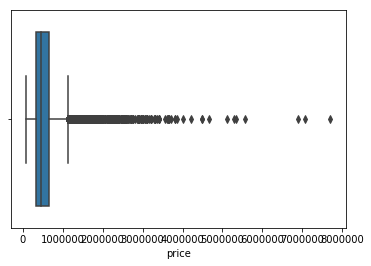

In [163]:
sns.boxplot(df.price)

In [164]:
from scipy import stats
z_score = np.abs(stats.zscore(df.price))

to_drop = np.where(z_score > 3.5)#using z-score to find which datapoints are extreme outliers using scores over 3.5 as the threshold
print(to_drop)
len(to_drop[0])
#Less than 300 rows out of over 20,000 should be safe to drop

(array([   21,   153,   246,   269,   282,   300,   312,   518,   540,
         556,   656,   779,   814,  1030,  1150,  1162,  1215,  1270,
        1280,  1313,  1359,  1431,  1446,  1674,  1730,  1768,  1943,
        2038,  2083,  2265,  2442,  2471,  2624,  2856,  2862,  2897,
        2972,  3018,  3037,  3089,  3154,  3226,  3255,  3278,  3341,
        3381,  3515,  3731,  3744,  3757,  3809,  3857,  3867,  3910,
        4009,  4028,  4031,  4145,  4186,  4214,  4264,  4335,  4402,
        4407,  4482,  4631,  4758,  4807,  4855,  4917,  4918,  5444,
        5584,  5612,  5697,  5744,  5874,  5961,  6035,  6039,  6189,
        6227,  6329,  6396,  6493,  6495,  6502,  6685,  6708,  6734,
        6765,  6777,  6788,  6995,  7028,  7184,  7245,  7304,  7306,
        7408,  7425,  7499,  7645,  7693,  7879,  7900,  7926,  7982,
        8042,  8085,  8145,  8184,  8215,  8436,  8629,  8901,  9166,
        9245,  9313,  9405,  9478, 10074, 10252, 10362, 10435, 10454,
       10457, 11213

282

In [165]:
df = df.drop([   21,   153,   246,   269,   282,   300,   312,   518,   540,
         556,   656,   779,   814,  1030,  1150,  1162,  1215,  1270,
        1280,  1313,  1359,  1431,  1446,  1674,  1730,  1768,  1943,
        2038,  2083,  2265,  2442,  2471,  2624,  2856,  2862,  2897,
        2972,  3018,  3037,  3089,  3154,  3226,  3255,  3278,  3341,
        3381,  3515,  3731,  3744,  3757,  3809,  3857,  3867,  3910,
        4009,  4028,  4031,  4145,  4186,  4214,  4264,  4335,  4402,
        4407,  4482,  4631,  4758,  4807,  4855,  4917,  4918,  5444,
        5584,  5612,  5697,  5744,  5874,  5961,  6035,  6039,  6189,
        6227,  6329,  6396,  6493,  6495,  6502,  6685,  6708,  6734,
        6765,  6777,  6788,  6995,  7028,  7184,  7245,  7304,  7306,
        7408,  7425,  7499,  7645,  7693,  7879,  7900,  7926,  7982,
        8042,  8085,  8145,  8184,  8215,  8436,  8629,  8901,  9166,
        9245,  9313,  9405,  9478, 10074, 10252, 10362, 10435, 10454,
       10457, 11213, 11245, 11266, 11390, 11434, 11523, 11608, 11736,
       11758, 11859, 11940, 11963, 12174, 12271, 12358, 12447, 12497,
       12565, 12601, 12636, 12638, 12700, 12764, 12859, 13007, 13058,
       13243, 13258, 13267, 13398, 13515, 13662, 13687, 13697, 13856,
       13954, 14017, 14039, 14070, 14126, 14172, 14219, 14241, 14372,
       14499, 14536, 14542, 14605, 14802, 14808, 15008, 15025, 15138,
       15144, 15166, 15190, 15232, 15241, 15244, 15363, 15468, 15539,
       15553, 15618, 15665, 15814, 16110, 16238, 16244, 16288, 16434,
       16511, 16600, 16706, 16759, 16803, 16811, 16930, 16955, 16987,
       17137, 17216, 17221, 17274, 17314, 17445, 17544, 17665, 17753,
       17885, 17966, 17981, 18185, 18192, 18194, 18212, 18273, 18288,
       18314, 18394, 18440, 18462, 18467, 18541, 18753, 18778, 18860,
       18867, 18897, 19002, 19133, 19200, 19221, 19308, 19336, 19431,
       19468, 19513, 19665, 19668, 19742, 19761, 19807, 19842, 19968,
       19994, 20080, 20138, 20217, 20231, 20279, 20309, 20310, 20425,
       20444, 20511, 20519, 20648, 20751, 20812, 20881, 20904, 21024,
       21125, 21150, 21185, 21294, 21317, 21352, 21451, 21490, 21498,
       21514, 21524, 21560], axis=0)

In [167]:
len(df)

21315

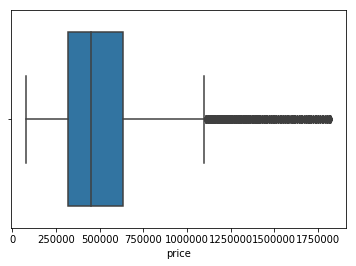

In [168]:
sns.boxplot(df.price)

### Dealing with NaNs

In [ ]:
features = df.drop("price", axis=1) #defining features  
target = df.loc[:,'price'] #defining target
target = pd.DataFrame(target)

In [46]:
features.sqft_basement = features.sqft_basement.replace('?', '0.0') #Replacing ? with the most common value

In [27]:
features.waterfront.fillna(0.0, inplace=True) #Less than 1% of the properties were on the water, so I replaced the NaNs with 0.0.

In [7]:
features.yr_renovated.value_counts(dropna=False) #It looks as if 0 indicates that it's never been renovated.

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

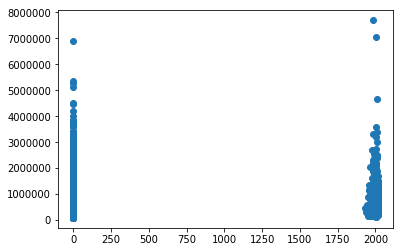

In [28]:
plt.scatter(features.yr_renovated, target)

In [29]:
yes_ren = df.loc[df.yr_renovated > 0.0]

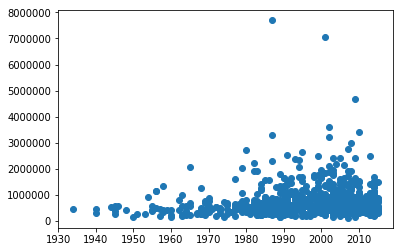

In [30]:
plt.scatter(yes_ren.yr_renovated, yes_ren.price) 

In [31]:
features = features.drop("yr_renovated", axis=1)

It looks like there is a general trend towards higher priced homes having been more recently renovated, the vast majority of all the homes that have been renovated are still 200000 or less, so I'm going to drop this column. 

In [32]:
features.view.value_counts(dropna=False) 

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [33]:
features.view.fillna(0.0, inplace=True)

### Multicollinearity Check

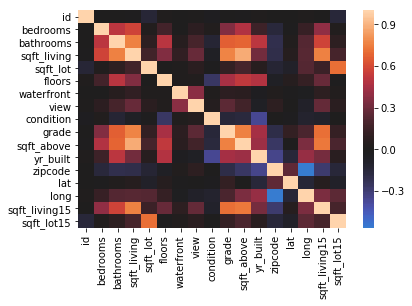

In [34]:
sns.heatmap(features.corr(), center=0);

In [37]:
features = df.drop(['price','id'], axis=1) #Dropping target variable and unusable ID column

In [39]:
abs(features.corr()) > 0.75 #Finding correlations higher than 75%

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [40]:
features = features.drop(['sqft_above','sqft_living15'], axis=1) #Too highly correlated with sqft_living

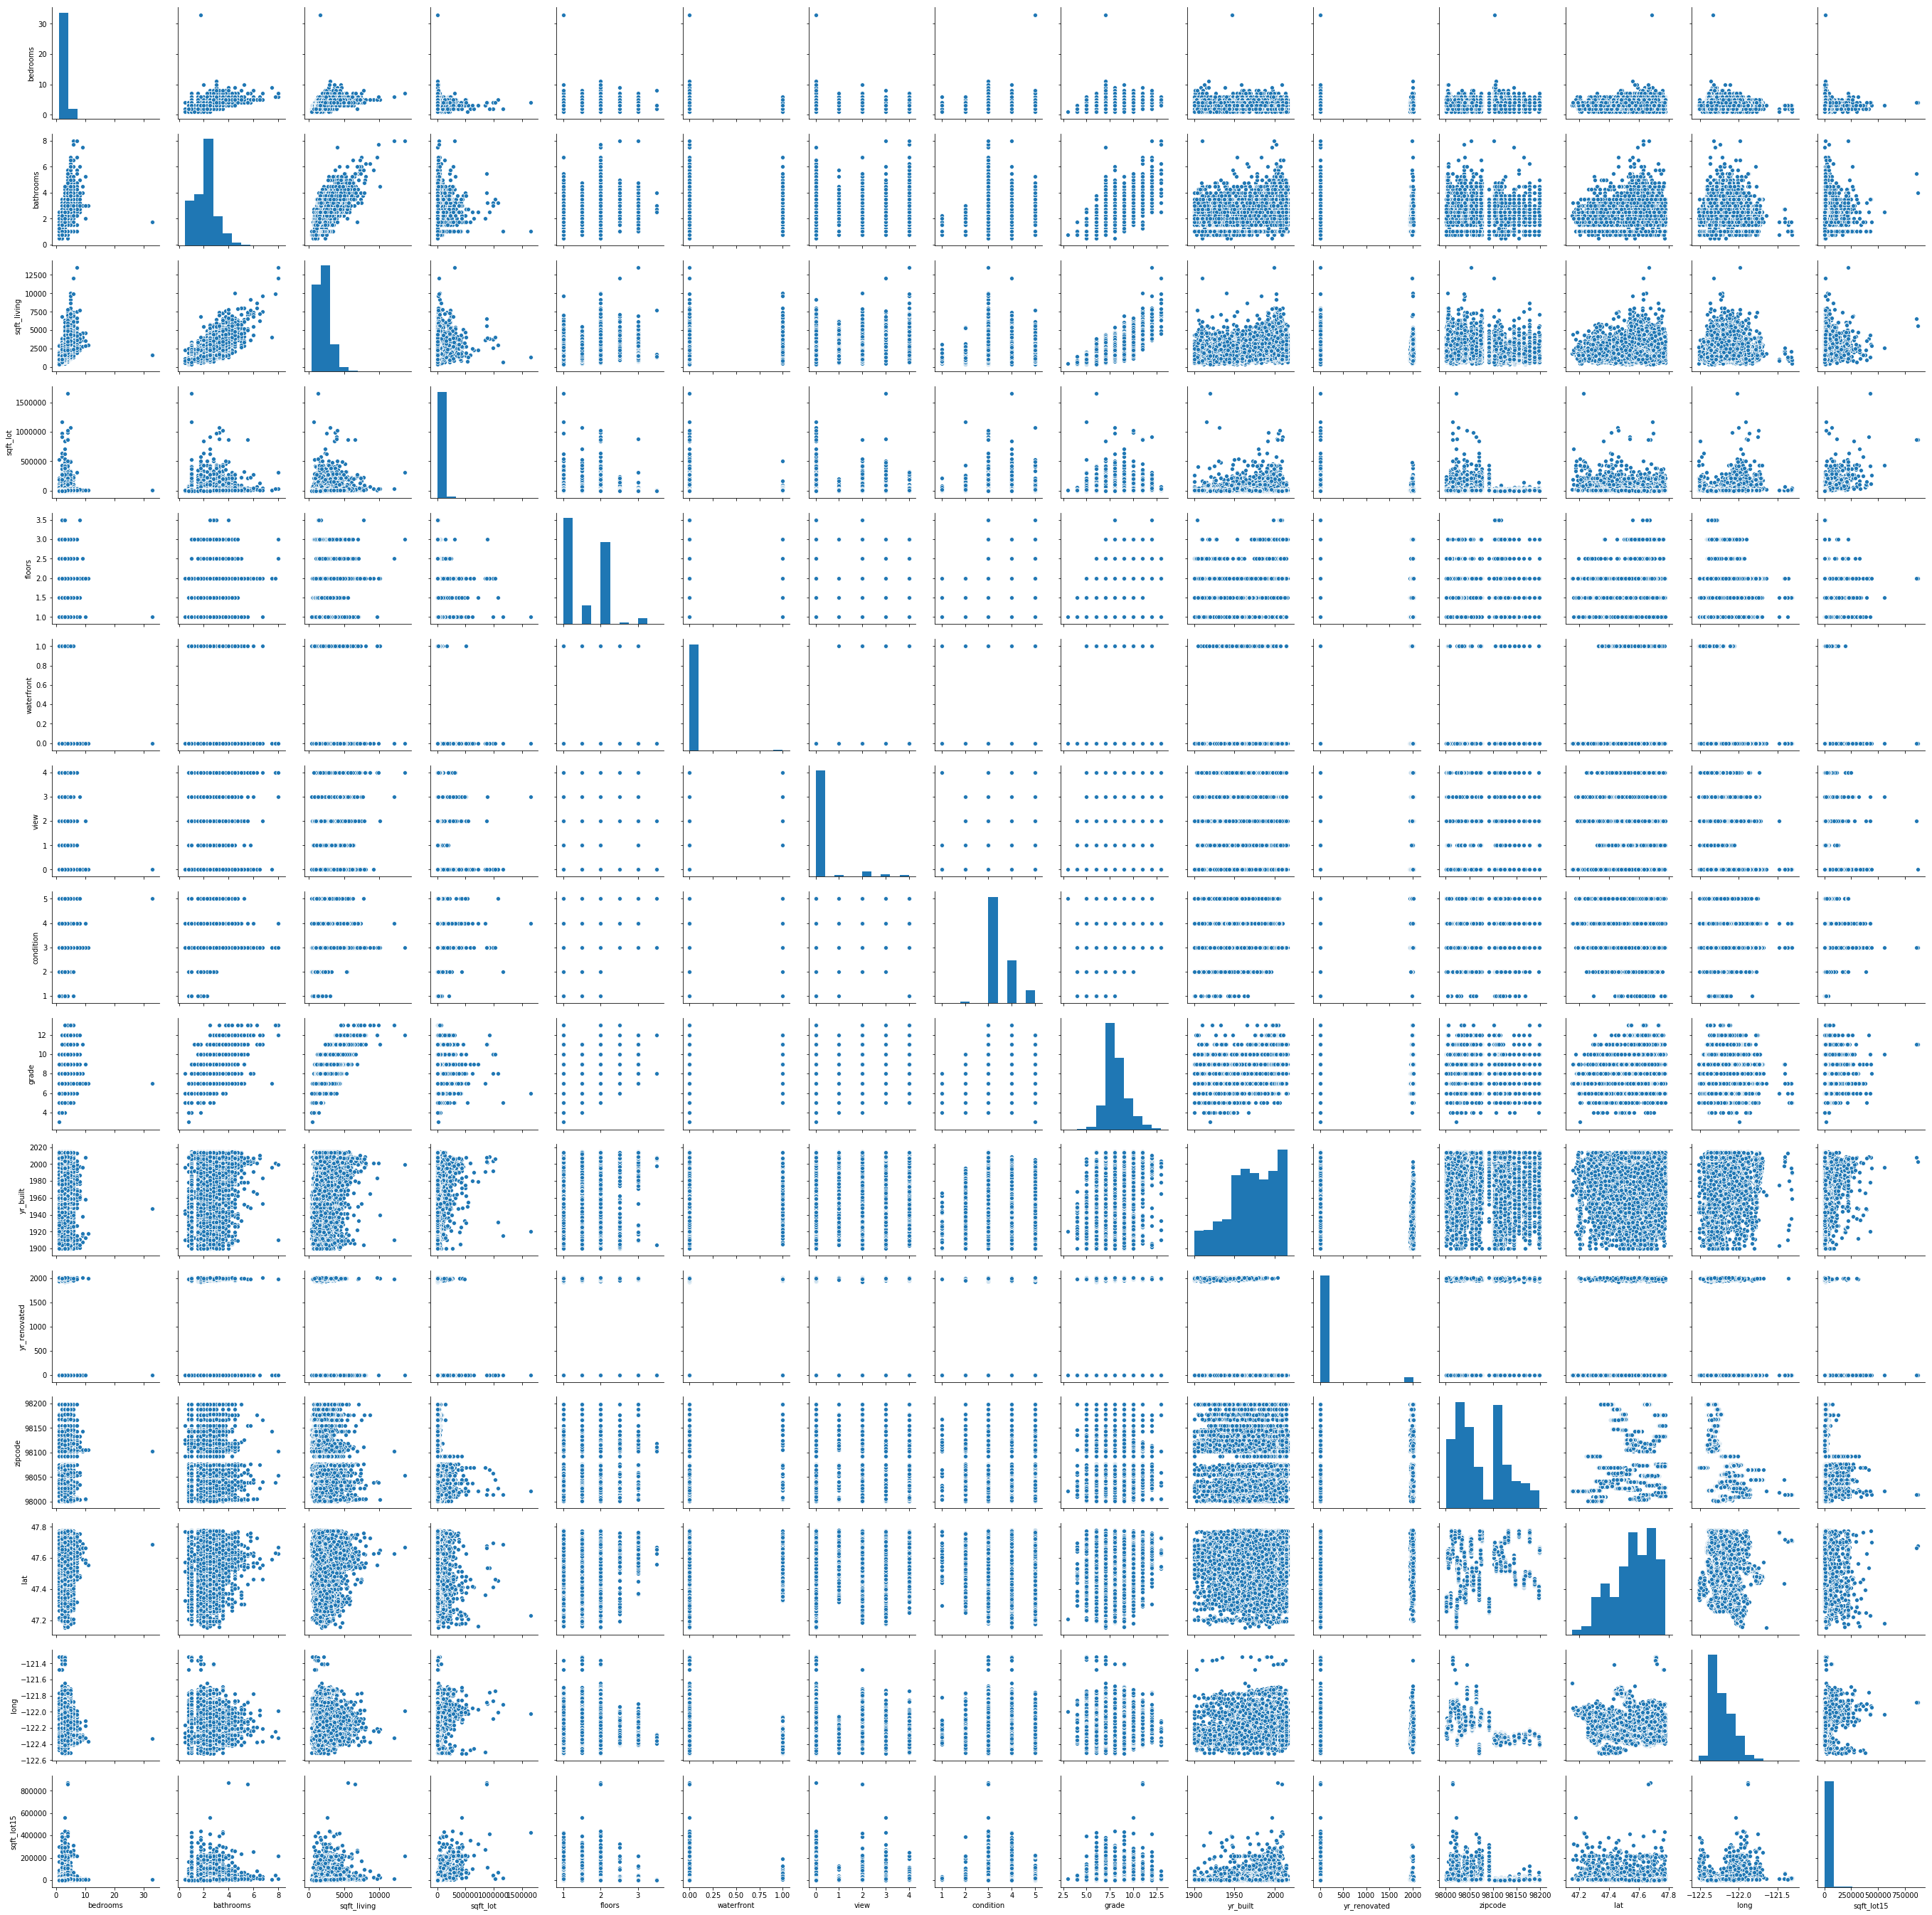

In [44]:
sns.pairplot(features);

### Normalize Non-Categorical Features


In [47]:
features.sqft_basement = features.sqft_basement.astype('float')

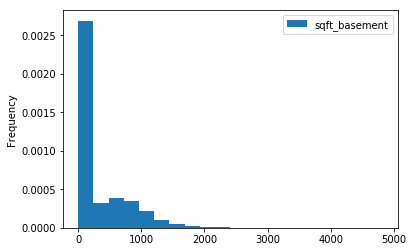

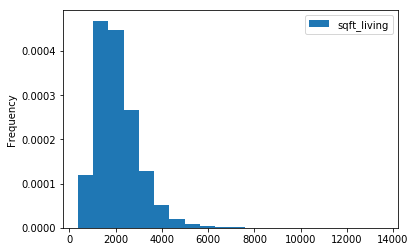

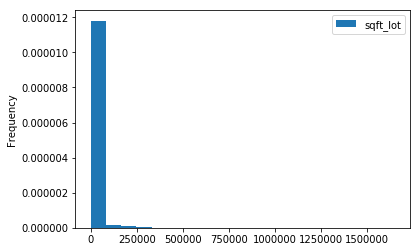

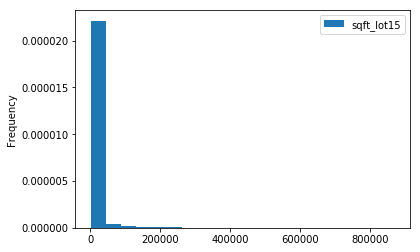

In [48]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(bins = 20, density=True)
    plt.legend()
    plt.show()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


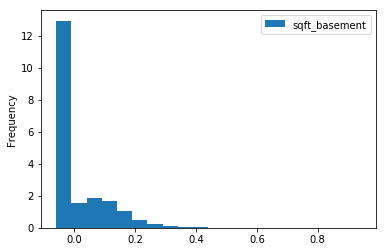

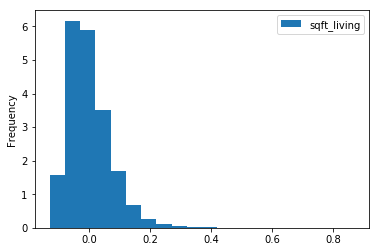

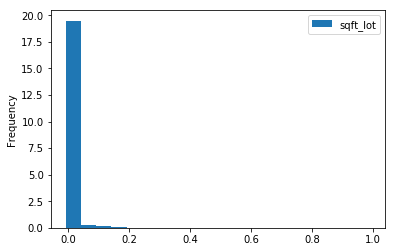

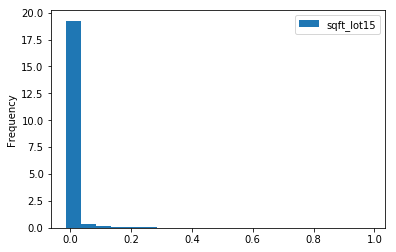

In [49]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    np.log(features[column]) #log transform each continuous variable


features.sqft_living = (features.sqft_living-np.mean(features.sqft_living))/(max(features.sqft_living)-min(features.sqft_living))
features.sqft_lot = (features.sqft_lot-np.mean(features.sqft_lot))/(max(features.sqft_lot)-min(features.sqft_lot))
features.sqft_lot15 = (features.sqft_lot15-np.mean(features.sqft_lot15))/(max(features.sqft_lot15)-min(features.sqft_lot15))
features.sqft_basement = (features.sqft_basement-np.mean(features.sqft_basement))/(max(features.sqft_basement)-min(features.sqft_basement))

#Mean normalization

for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(bins = 20, density=True)
    plt.legend()
    plt.show()

### One-Hot Encode Categorical Features

In [ ]:
features = features.drop(['date', 'lat', 'long', 'view'], axis=1)  


Dropping view because it indicated whether the house has been viewed by prospective buyers. It may be interesting to know how many times it's been viewed before it's been sold, but that's not the purpose of this study. 

Dropping date sold because it may give us information about market fluctuations but can't predict future market fluctuations (should be a study on it's own), and lat and long because zip code as an indicator of area has more to do with housing prices because of school districts, etc, than it's precise location on a map. Possibility to redo this study in the future to add lat and long back in and see what happens.

In [ ]:
cat_bedrooms = features.bedrooms.astype('category')
cat_bathrooms = features.bathrooms.astype('category')
cat_floors = features.floors.astype('category')
cat_waterfront = features.waterfront.astype('category')
cat_condition = features.condition.astype('category')
cat_grade = features.grade.astype('category')

In [ ]:
bath_dum = pd.get_dummies(cat_bathrooms, prefix="bath_")
bed_dum = pd.get_dummies(cat_bedrooms, prefix="bed_")
floors_dum = pd.get_dummies(cat_floors, prefix="flrs_")
waterfront_dum = pd.get_dummies(cat_waterfront, prefix="wf_")
condition_dum = pd.get_dummies(cat_condition, prefix="con_")
grade_dum = pd.get_dummies(cat_grade, prefix="grade_")

In [ ]:
features = features.drop(['bathrooms', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade'], axis=1) #dropping to replace with dummy variables

In [ ]:
features = pd.concat([features, bath_dum, bed_dum, floors_dum, waterfront_dum, condition_dum, grade_dum], axis=1)

### Binning Categories

In [ ]:
bins = [1900, 1951, 1975, 1997, 2015]

yr_built_bins = pd.cut(features.yr_built, bins)

In [ ]:
yr_built_bins = yr_built_bins.cat.as_unordered()


In [ ]:
yr_built_bins.value_counts().plot(kind='bar');

In [ ]:
features.yr_built = yr_built_bins
features.yr_built = features.yr_built.cat.codes
yr_built_dum = pd.get_dummies(yr_built_bins, prefix='yr_built_') #Binning, getting category codes, and dummy variables

In [ ]:
features = pd.concat([features, yr_built_dum], axis=1)
features = features.drop('yr_built', axis=1)

In [ ]:
features.zipcode.describe() #Making a decision on what the bins should be

In [ ]:
bins = [98001, 98033, 98065, 98118, 98199]

zip_bins = pd.cut(features.zipcode, bins)


In [ ]:
features.zipcode = zip_bins
features.zipcode = features.zipcode.cat.codes
zip_dum = pd.get_dummies(zip_bins, prefix='zip')

features = features.drop('zipcode', axis=1)
features = pd.concat([features, zip_dum], axis=1)

## Data Exploration

In [ ]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    features[column].plot.hist(density=True)
    features[column].plot.kde(label=column)
    plt.legend()
    plt.show() #Looking to fulfill normality assumption

In [ ]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    sns.jointplot(x= features[column], y=target, data=features, kind='reg')
    plt.show() #Checking for linearity

In [ ]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    sns.jointplot(x= features[column], y=np.log(target), data=features, kind='reg')
    plt.show() #checking for linearity with log transformed target

The log transformed target variable increased linearity, but not for sqft_lot or sqft_lot15, and I'm still on the fence about sqft_basement. 

## Train-Test-Split

In [ ]:
features.drop(['sqft_lot','sqft_lot15'], axis=1, inplace=True) #Dropping for linearity issues

In [ ]:
cleaned_df = pd.concat([target, features], axis=1)

### Initial Price

In [ ]:
y = cleaned_df.price
X = cleaned_df.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3) #80/20 Train v. Test split

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

#### Not terrible, but could be better

### Log Transformed Price

In [ ]:
y = np.log(cleaned_df2.price)
X = cleaned_df2.drop(["price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3) #80/20 Train v. Test split

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

#### Much better!

## Modeling

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [ ]:
x_cols = ['sqft_living', 'sqft_basement']
dependent = 'price'
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for i, col in enumerate(x_cols):
    formula = dependent + '~' + col
    model = smf.ols(formula=formula, data=cleaned_df).fit()
    X_new = pd.DataFrame({col: [cleaned_df[col].min(), cleaned_df[col].max()]});
    preds = model.predict(X_new)
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[1+i])
    
pd.DataFrame(results) #Results for just the continuous variables

## Take 2 with log transformed target

In [ ]:
log_target = np.log(target)
cleaned_df2 = pd.concat([log_target, features], axis=1)
cleaned_df2 = cleaned_df2.rename({0:'price'}, axis=1)

x_cols = ['sqft_living', 'sqft_basement']
dependent = 'price'
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for i, col in enumerate(x_cols):
    formula = dependent + '~' + col
    model = smf.ols(formula=formula, data=cleaned_df2).fit()
    X_new = pd.DataFrame({col: [cleaned_df2[col].min(), cleaned_df2[col].max()]});
    preds = model.predict(X_new)
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print(results[1+i])
    
pd.DataFrame(results)

The square footage of living space, basement, and living space of nearby homes seem to have the most influence on housing prices, but the variance in price isn't explained well by any of the independent variables. 

## Take 3 with categorical variables

In [ ]:
cleaned_df.columns = [x.strip().replace('.', '_') for x in cleaned_df.columns]
cleaned_df.columns = [x.strip().replace(']', ')') for x in cleaned_df.columns]
cleaned_df.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)

In [ ]:
cleaned_df.columns

In [ ]:
bath_cols = cleaned_df.columns[4:32]
bed_cols = cleaned_df.columns[33:44]
flrs_cols = cleaned_df.columns[45:50]
wf_cols = cleaned_df.columns[51:52]
condition_cols = cleaned_df.columns[53:57]
grade_cols = cleaned_df.columns[58:68]
yr_built_cols = cleaned_df.columns[69:73]
zip_cols = cleaned_df.columns[73:] #Separating categories for each model, one dropped for the one-hot encoded

In [ ]:
cat_cols = [bath_cols, bed_cols, flrs_cols, wf_cols, condition_cols, grade_cols, yr_built_cols, zip_cols]
dependent = 'price'
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for col in cat_cols:
    sum_cols = "+".join(col)
    formula = dependent + '~' + sum_cols
    model = smf.ols(formula=formula, data=cleaned_df).fit()
    print(model.summary()) #Model with initial target
 

In [ ]:
cleaned_df2.columns = [x.strip().replace('.', '_') for x in cleaned_df2.columns]
cleaned_df2.columns = [x.strip().replace(']', ')') for x in cleaned_df2.columns]
cleaned_df2.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)

bath_cols2 = cleaned_df2.columns[4:32]
bed_cols2 = cleaned_df2.columns[33:44]
flrs_cols2 = cleaned_df2.columns[45:50]
wf_cols2 = cleaned_df2.columns[51:52]
condition_cols2 = cleaned_df2.columns[53:57]
grade_cols2 = cleaned_df2.columns[58:68]
yr_built_cols2 = cleaned_df2.columns[69:73]
zip_cols2 = cleaned_df2.columns[73:]



cat_cols2 = [bath_cols2, bed_cols2, flrs_cols2, wf_cols2, condition_cols2, grade_cols2, yr_built_cols2, zip_cols2]
for col in cat_cols2:
    sum_cols = "+".join(col)
    formula = dependent + '~' + sum_cols
    model = smf.ols(formula=formula, data=cleaned_df2).fit()
    print(model.summary()) #Model with log transformed target

Now that we've look at our baselines for categorical and continuous variables, we can move on to using our training set!

## Take 4 with training data

In [ ]:
X_train.columns

In [ ]:
X_train = X_train.drop(["bath__8_0", 'bed__33', 'flrs__3_5', 'con__5', 'grade__13', 'zip_98118_98199', 'yr_built_1997_2015', 'wf__1_0'], axis=1) #Dropping column from categorical variables

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
print(linreg.intercept_) #Modeling with sklearn
linreg.coef_

In [ ]:
import statsmodels.api as sm #Modeling 
features_int = sm.add_constant(X_train)
model = sm.OLS(y_train,features_int).fit()
model.summary()

### Fixing multicolinearity problems

In [ ]:
features = cleaned_df.drop("price", axis=1)

In [ ]:
abs(features.corr()) > 0.75 

In [ ]:
features_int = sm.add_constant(X_train)
model = sm.OLS(y_train,features_int).fit()
model.summary()